# Analysis of zeb BP2-CaM compact
## Comparison of ca-mg-1-2 and ca-only

In [1]:
import sys
import os
import pandas as pd
import numpy as np

# Add the lda directory to Python path
lda_path = os.path.join(os.getcwd(), 'lda')
if lda_path not in sys.path:
    sys.path.append(lda_path)

# Import the interactive pipeline functions
from pipeline_helper import run_interactive_pipeline, create_interactive_pipeline_configs, summarize_and_evaluate

# Import your existing data access module
from data_access import create_dataframe_factory, list_available_constructs_subconstructs

print("✅ Imports completed successfully!")

✅ Imports completed successfully!


In [2]:
data_dir = '/work/hdd/bfri/jjeong7/analysis_output/dist_maps'
constructs_dict, subconstructs_dict = list_available_constructs_subconstructs(base_dir=data_dir)

# Specific states of specific proteins
data_factory = create_dataframe_factory(
    base_dir=data_dir, 
    constructs=['calmodulin-compact'],
    subconstructs=['ca-only','ca-mg-1-2'],
    apply_boundary_filter=True, # 🛠️ ACTIVATE TRANSFORMATION
    n_edge=3,
    min_frame=0,
)

In [3]:
# Create all possible pipeline combinations
configs = create_interactive_pipeline_configs()

🚀 Starting Interactive Pipeline Runner
💡 Variance runs first, then feature selection, then dimensionality reduction
⚙️  You'll set parameters for each phase

PHASE 1: VARIANCE


Found cached result for VARIANCE (pipeline_cache/variance.pkl). Load? (Y/n):  n



[VARIANCE]
⚙️  Hyperparameters:
  show_plot: True - Show variance plots for analysis
  knee_S: 1.0 - Knee detection sensitivity - higher = more features
  outlier_multiplier: 3.0 - Outlier detection threshold multiplier
  fallback_percentile: 90 - Fallback percentile for threshold
  min_clean_ratio: 0.5 - Min fraction of features to keep in 'clean' set before reverting to full data



Modify? (y/N):  n


Running VARIANCE...
Pass 1: Analyzing feature variance (Streaming from disk)...
📊 Filtered 120 files down to 20 matching criteria
Loaded 144 canonical residues from /work/hdd/bfri/jjeong7/analysis_output/dist_maps/calmodulin-compact/ca-mg-1-2/canonical_resids.npy
Variance statistics:
  Max variance: 27.998905
  Min variance: 0.002961
  Mean variance: 2.250603
  Median variance: 1.737149
  Total features: 9453
  ⚠️  Detected 135 outlier variances > 11.012230
  Top 5 outlier values: [np.float32(27.998905), np.float32(25.274742), np.float32(24.496231), np.float32(24.207233), np.float32(24.163115)]
  Using 9318 values for knee detection
  Knee detected at index 129 with threshold 8.173931
  Features above threshold: 264


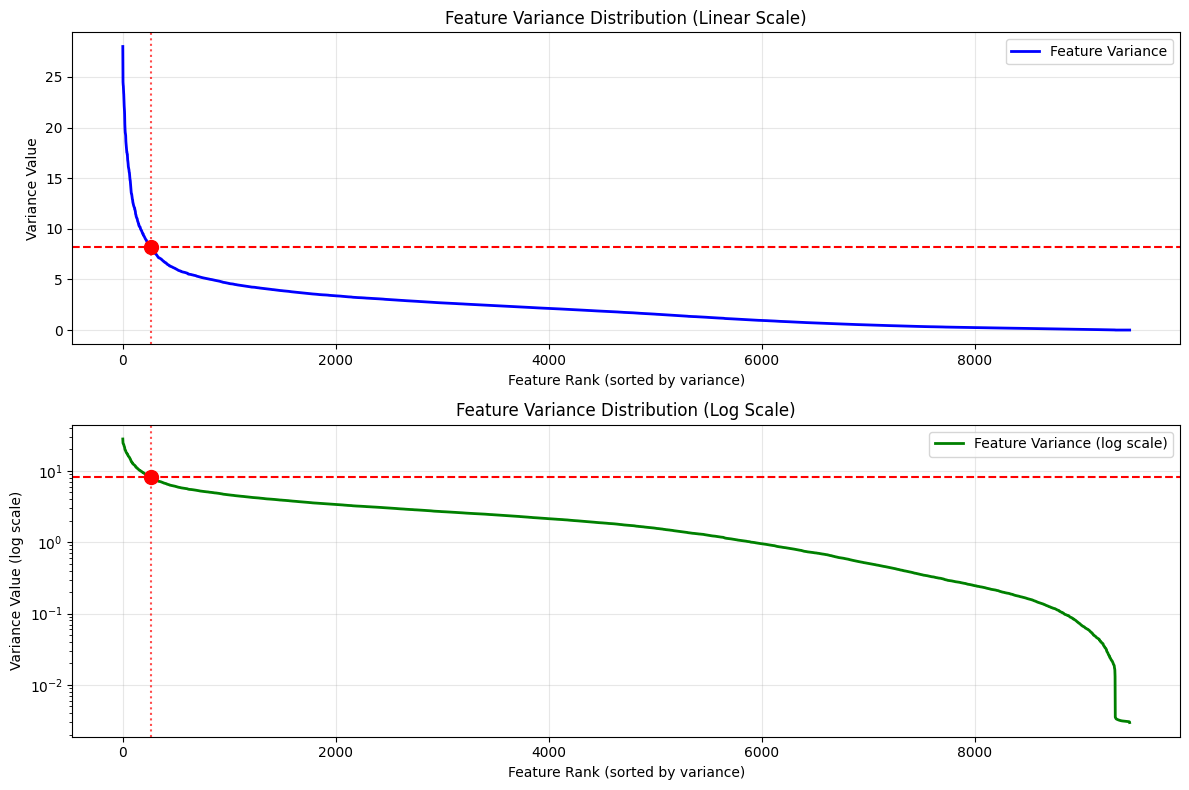

Pass 2: Filtering columns (Retaining 264 features)...
📊 Filtered 120 files down to 20 matching criteria
VARIANCE Result Shape: (45000, 269)



Accept VARIANCE results? (y/N):  y


Results accepted and cached to pipeline_cache/variance.pkl
Variance Output: (45000, 269)

CLASS ASSIGNMENT
Choose class assignment method:
1. Default: construct + subconstruct
2. GMM: Gaussian Mixture Model (shared states)
3. Spectral: Non-linear spectral clustering
4. TICA: Kinetic landscape state assignment


Enter choice (1-4):  2



[CLUSTERING : GMM]
📋 Parameter Controls:
  🎯 Method: Gaussian Mixture Model (with BIC visualization)
⚙️  Hyperparameters:
  stride: 10 - Data sampling stride - higher = faster but less precise
  max_k: 15 - Maximum clusters to test - higher = more options
  S: 1.0 - Knee sensitivity - higher = more clusters, lower = fewer
  show_plots: True - Show BIC diagnostics plot



Modify? (y/N):  n


Sampling dataset (stride=10) to find optimal GMM components...
✅ BIC analysis complete. Optimal K (S=1.0): 5


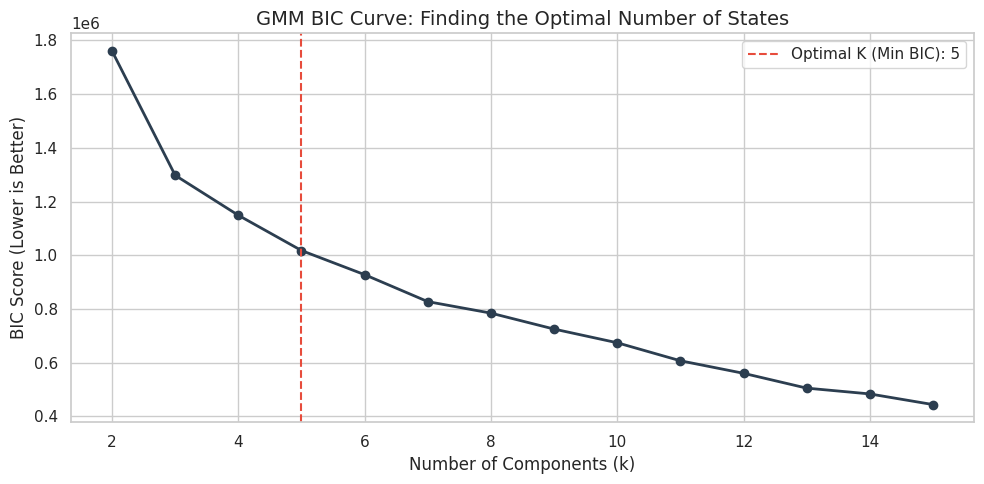

Fitting final GMM with 5 components...
Assigning GMM state labels to the full dataset...
Assigned 5 GMM-based classes

--- Cluster Composition (%) ---
col_0              calmodulin-compact | ca-mg-1-2  \
global_cluster_id                                   
0                                           42.69   
1                                           53.31   
2                                           49.03   
3                                           40.99   
4                                           60.57   

col_0              calmodulin-compact | ca-only  
global_cluster_id                                
0                                         57.31  
1                                         46.69  
2                                         50.97  
3                                         59.01  
4                                         39.43  


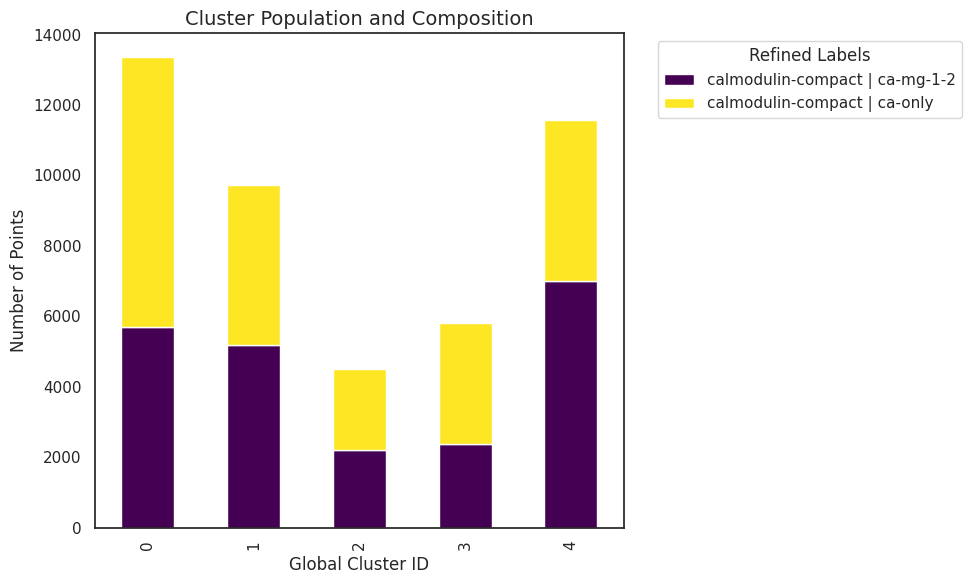

Found cached result for FISHER_AMINO (pipeline_cache/fisher_amino.pkl). Load? (Y/n):  n



[FEATURE_SELECTION : FISHER_AMINO]
📋 Parameter Controls:
  🔬 Method: Fisher scoring with AMINO dimensionality reduction
⚙️  Hyperparameters:
  max_outputs: None - Target features (None = Dynamic selection via AMINO Distortion Jump method)
  knee_S: 2.0 - Sensitivity for the initial Fisher candidate knee - higher = more features


KeyboardInterrupt: Interrupted by user

In [4]:
print("🚀 Starting Interactive Pipeline Runner")
print("💡 Variance runs first, then feature selection, then dimensionality reduction")
print("⚙️  You'll set parameters for each phase")

# Use the pipeline runner
results, base_df = run_interactive_pipeline(data_factory, configs)

In [ ]:
import pickle
from pathlib import Path

export_dir = Path("results/cmpcam_half_gmm")
export_dir.mkdir(parents=True, exist_ok=True)

try:
    with open(export_dir / "pipeline_results.pkl", "wb") as f:
        # Protocol 5 is faster and handles larger objects better
        pickle.dump(results, f, protocol=pickle.HIGHEST_PROTOCOL)

    with open(export_dir / "base_df_metadata.pkl", "wb") as f:
        pickle.dump(base_df, f, protocol=pickle.HIGHEST_PROTOCOL)
        
    print(f"✅ State preserved in {export_dir}/")
except Exception as e:
    print(f"❌ Save failed: {e}")